In [1]:
import os
import sys

# Define local pass #
wd_path = '/home/hbkoziel/pyfesom/'

#sys.path.append("codes/modules") # add custom Vibe 's modules
sys.path.append('../..') # add standard 's modules
sys.path.append('../modules')
#########################################

In [2]:
import pyfesom as pf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
#from matplotlib import cm
#sys.path.append('/home/hbkoziel/pyfesom/pyfesom/cmocean/')
#import cmocean as cmap
#from mpl_toolkits.basemap import Basemap
import numpy as np
from netCDF4 import Dataset
import time
import seaborn as sns

import xarray as xr
import pandas as pd

No joblib
no cmocean


In [75]:
df_eu = pd.read_pickle('Eurasian_basin_monthly')
df_am = pd.read_pickle('Amerasian_basin_monthly')

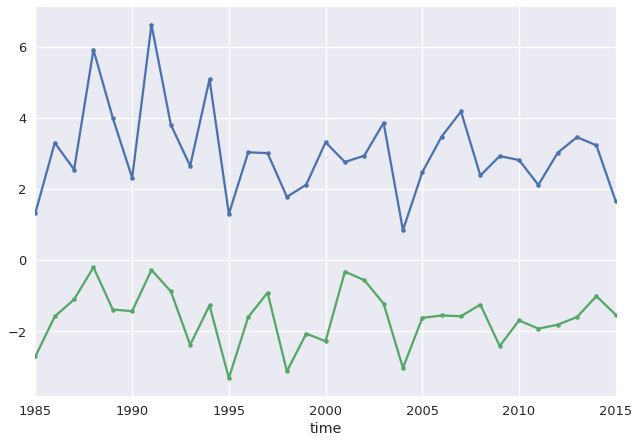

In [87]:
df_eu["VNFP"] = df_eu["wnf"]
df_eu["VNFN"] = df_eu["wnf"]
df_eu.VNFP[df_eu.VNFP < 0] = np.nan
df_eu.VNFN[df_eu.VNFN > 0] = np.nan

plt.style.use('seaborn')
plt.style.use('seaborn-talk')
#df_eu["VNFP"].plot()

df_eu2 = df_eu
df_eu2.VNFP[np.abs(df_eu2.VNFP-df_eu2.VNFP.mean()) > (3*df_eu2.VNFP.std())] = np.nan
df_eu2.VNFN[np.abs(df_eu2.VNFN-df_eu2.VNFN.mean()) > (3*df_eu2.VNFN.std())] = np.nan

# print np.nanmean(df_eu["VNFP"])
# print np.nanstd(df_eu["VNFP"])

#df_eu2["VNFP"].plot()

df_eu_mar2 = df_eu2[df_eu2.index.month == 3]
#df_eu_mar2["VNFP"].plot()
df_eu_mar3 = df_eu2[df_eu2.index.month == 9]
#df_eu_mar3["VNFP"].plot()
df_eu_yearlymean2 = df_eu2.resample('Y').std()
df_eu_yearlymean3 = df_eu2.resample('Y').sum()

df_eu_yearlymean3["VNFP"].plot(style = '.-')
df_eu_yearlymean3["VNFN"].plot(style = '.-')
#plt.plot(df_eu_yearlymean3["VNFP"]-df_eu_yearlymean3["VNFN"])

/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

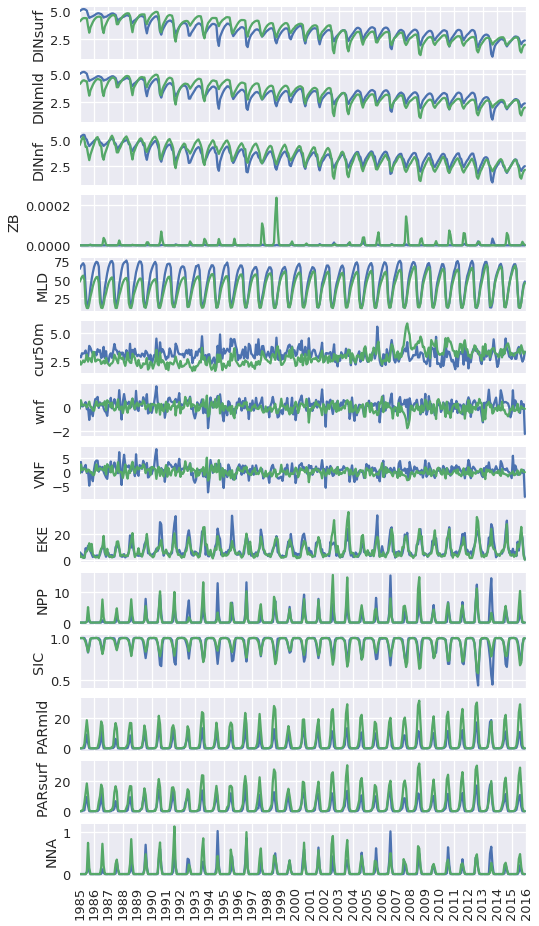

In [5]:
figsize = (8, 16)
rows,cols = 14,1

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator(interval=6)  # every month
years_fmt = mdates.DateFormatter('%Y')

#datemin = np.datetime64(df_eu_sep['time'][0], 'Y')
#datemax = np.datetime64(df_eu_sep['time'][-1], 'Y') + np.timedelta64(1, 'Y')
    
tracerlist = ['DINsurf','DINmld','DINnf','ZB','MLD','cur50m','wnf','VNF','EKE','NPP','SIC','PARmld','PARsurf','NNA']
plt.style.use('seaborn')
plt.style.use('seaborn-talk')

#axs = plt.figure(figsize=figsize, constrained_layout=True).subplots(rows,cols)
fig = plt.figure(figsize=figsize, constrained_layout=False)
axs = fig.subplots(rows,cols,sharey=False,sharex=True)

for ind, var in zip(range(0,len(tracerlist)), tracerlist):
    axs[ind].plot(df_eu[var])
    axs[ind].plot(df_am[var])
    axs[ind].set_ylabel(var)
    # format the ticks
    axs[ind].xaxis.set_major_locator(years)
    axs[ind].xaxis.set_major_formatter(years_fmt)
    #axs[ind].xaxis.set_minor_locator(months)
    # format the coords message box
    axs[ind].format_xdata = mdates.DateFormatter('%Y')
    # round to nearest years.
    axs[ind].set_xlim('1985-01-01', '2016-01-01')

plt.setp(axs[ind].get_xticklabels(),'rotation', 90)
# fig.autofmt_xdate()

In [6]:
df_eu_mar = df_eu[df_eu.index.month == 3]
df_am_mar = df_am[df_am.index.month == 3]

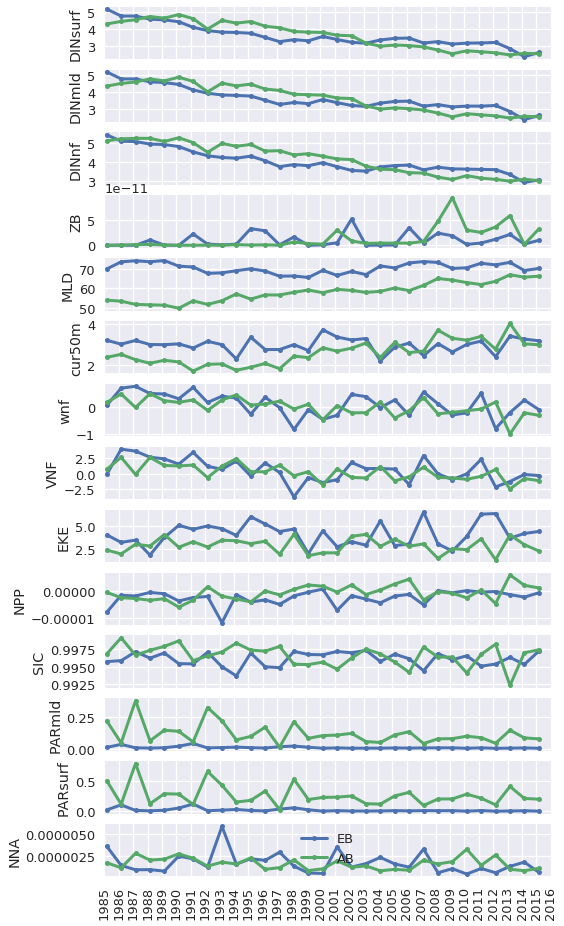

In [7]:
figsize = (8, 16)
rows,cols = 14,1

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator(interval=6)  # every month
years_fmt = mdates.DateFormatter('%Y')

#datemin = np.datetime64(df_eu_sep['time'][0], 'Y')
#datemax = np.datetime64(df_eu_sep['time'][-1], 'Y') + np.timedelta64(1, 'Y')
    
tracerlist = ['DINsurf','DINmld','DINnf','ZB','MLD','cur50m','wnf','VNF','EKE','NPP','SIC','PARmld','PARsurf','NNA']
plt.style.use('seaborn')
plt.style.use('seaborn-talk')

#axs = plt.figure(figsize=figsize, constrained_layout=True).subplots(rows,cols)
fig = plt.figure(figsize=figsize, constrained_layout=False)
axs = fig.subplots(rows,cols,sharey=False,sharex=True)

for ind, var in zip(range(0,len(tracerlist)), tracerlist):
    axs[ind].plot(df_eu_mar[var], '.-', lw = 3, markersize = 10, label = 'EB')
    axs[ind].plot(df_am_mar[var], '.-', lw = 3, markersize = 10, label = 'AB')
    axs[ind].set_ylabel(var)
    # format the ticks
    axs[ind].xaxis.set_major_locator(years)
    axs[ind].xaxis.set_major_formatter(years_fmt)
    #axs[ind].xaxis.set_minor_locator(months)
    # format the coords message box
    axs[ind].format_xdata = mdates.DateFormatter('%Y')
    # round to nearest years.
    axs[ind].set_xlim('1985-01-01', '2016-01-01')

plt.setp(axs[ind].get_xticklabels(),'rotation', 90)
plt.legend()
# fig.autofmt_xdate()

In [8]:
df_eu_sep = df_eu[df_eu.index.month == 9]
df_am_sep = df_am[df_am.index.month == 9]

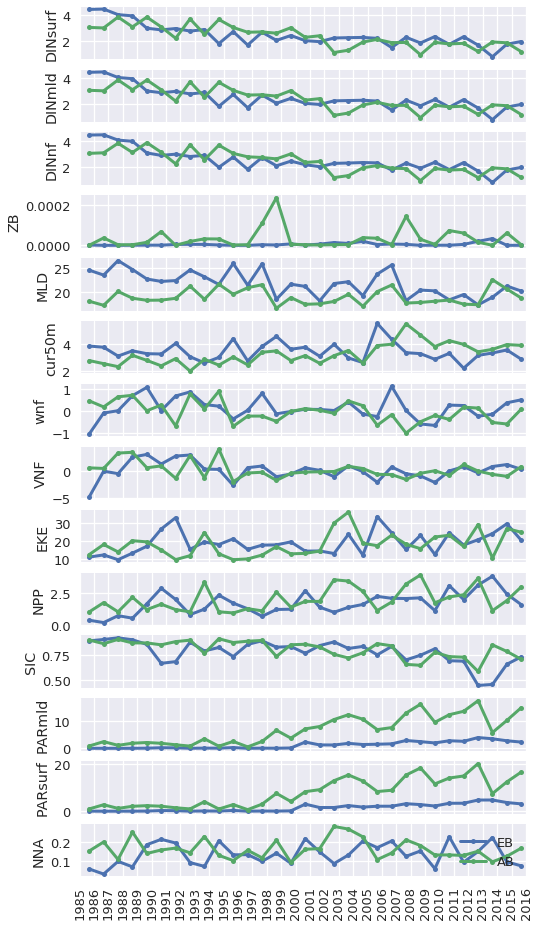

In [9]:
figsize = (8, 16)
rows,cols = 14,1

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator(interval=6)  # every month
years_fmt = mdates.DateFormatter('%Y')

#datemin = np.datetime64(df_eu_sep['time'][0], 'Y')
#datemax = np.datetime64(df_eu_sep['time'][-1], 'Y') + np.timedelta64(1, 'Y')

tracerlist = ['DINsurf','DINmld','DINnf','ZB','MLD','cur50m','wnf','VNF','EKE','NPP','SIC','PARmld','PARsurf','NNA']
plt.style.use('seaborn')
plt.style.use('seaborn-talk')

#axs = plt.figure(figsize=figsize, constrained_layout=True).subplots(rows,cols)
fig = plt.figure(figsize=figsize, constrained_layout=False)
axs = fig.subplots(rows,cols,sharey=False,sharex=True)

for ind, var in zip(range(0,len(tracerlist)), tracerlist):
    axs[ind].plot(df_eu_sep[var], '.-', lw = 3, markersize = 10, label = 'EB')
    axs[ind].plot(df_am_sep[var], '.-', lw = 3, markersize = 10, label = 'AB')
    axs[ind].set_ylabel(var)
    # format the ticks
    axs[ind].xaxis.set_major_locator(years)
    axs[ind].xaxis.set_major_formatter(years_fmt)
    #axs[ind].xaxis.set_minor_locator(months)
    # format the coords message box
    axs[ind].format_xdata = mdates.DateFormatter('%Y')
    # round to nearest years.
    axs[ind].set_xlim('1985-01-01', '2016-01-01')

plt.setp(axs[ind].get_xticklabels(),'rotation', 90)
plt.legend()
# fig.autofmt_xdate()

In [10]:
df_eu_yearlymean = df_eu.resample('Y').mean()
df_am_yearlymean = df_am.resample('Y').mean()

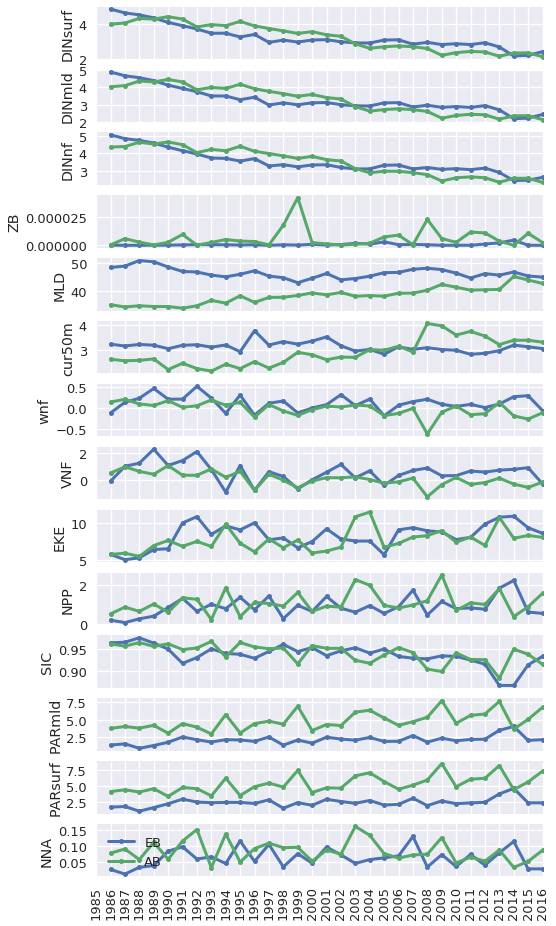

In [11]:
figsize = (8, 16)
rows,cols = 14,1

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator(interval=6)  # every month
years_fmt = mdates.DateFormatter('%Y')

#datemin = np.datetime64(df_eu_sep['time'][0], 'Y')
#datemax = np.datetime64(df_eu_sep['time'][-1], 'Y') + np.timedelta64(1, 'Y')
    
tracerlist = ['DINsurf','DINmld','DINnf','ZB','MLD','cur50m','wnf','VNF','EKE','NPP','SIC','PARmld','PARsurf','NNA']
plt.style.use('seaborn')
plt.style.use('seaborn-talk')

#axs = plt.figure(figsize=figsize, constrained_layout=True).subplots(rows,cols)
fig = plt.figure(figsize=figsize, constrained_layout=False)
axs = fig.subplots(rows,cols,sharey=False,sharex=True)

for ind, var in zip(range(0,len(tracerlist)), tracerlist):
    axs[ind].plot(df_eu_yearlymean[var], '.-', lw = 3, markersize = 10, label = 'EB')
    axs[ind].plot(df_am_yearlymean[var], '.-', lw = 3, markersize = 10, label = 'AB')
    axs[ind].set_ylabel(var)
    # format the ticks
    axs[ind].xaxis.set_major_locator(years)
    axs[ind].xaxis.set_major_formatter(years_fmt)
    #axs[ind].xaxis.set_minor_locator(months)
    # format the coords message box
    axs[ind].format_xdata = mdates.DateFormatter('%Y')
    # round to nearest years.
    axs[ind].set_xlim('1985-01-01', '2016-01-01')

plt.setp(axs[ind].get_xticklabels(),'rotation', 90)
plt.legend()
# fig.autofmt_xdate()

In [12]:
df_eu_yearlyint = df_eu.resample('Y').sum() *30
df_am_yearlyint = df_am.resample('Y').sum() *30

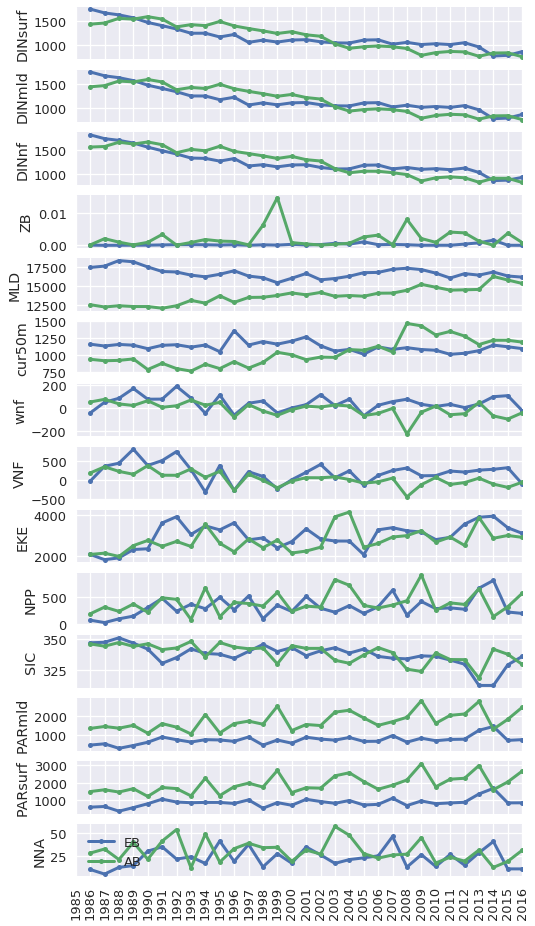

In [13]:
figsize = (8, 16)
rows,cols = 14,1

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator(interval=6)  # every month
years_fmt = mdates.DateFormatter('%Y')

#datemin = np.datetime64(df_eu_sep['time'][0], 'Y')
#datemax = np.datetime64(df_eu_sep['time'][-1], 'Y') + np.timedelta64(1, 'Y')
    
tracerlist = ['DINsurf','DINmld','DINnf','ZB','MLD','cur50m','wnf','VNF','EKE','NPP','SIC','PARmld','PARsurf','NNA']
plt.style.use('seaborn')
plt.style.use('seaborn-talk')

#axs = plt.figure(figsize=figsize, constrained_layout=True).subplots(rows,cols)
fig = plt.figure(figsize=figsize, constrained_layout=False)
axs = fig.subplots(rows,cols,sharey=False,sharex=True)

for ind, var in zip(range(0,len(tracerlist)), tracerlist):
    axs[ind].plot(df_eu_yearlyint[var], '.-', lw = 3, markersize = 10, label = 'EB')
    axs[ind].plot(df_am_yearlyint[var], '.-', lw = 3, markersize = 10, label = 'AB')
    axs[ind].set_ylabel(var)
    # format the ticks
    axs[ind].xaxis.set_major_locator(years)
    axs[ind].xaxis.set_major_formatter(years_fmt)
    #axs[ind].xaxis.set_minor_locator(months)
    # format the coords message box
    axs[ind].format_xdata = mdates.DateFormatter('%Y')
    # round to nearest years.
    axs[ind].set_xlim('1985-01-01', '2016-01-01')

plt.setp(axs[ind].get_xticklabels(),'rotation', 90)
plt.legend()
# fig.autofmt_xdate()

In [14]:
df_eu_yearlystd = df_eu.resample('Y').std()
df_am_yearlystd = df_am.resample('Y').std()

In [15]:
# plt.plot(df_eu.VNF,'.-')
# #plt.plot(df_eu_evnf.EVNF*100000000,'.-')
# plt.plot(df_eu_yearlymean.VNF,'.-')

In [16]:
df_eu_evnf = pd.read_pickle('Eurasian_basin_EVNF')
df_am_evnf = pd.read_pickle('Amerasian_basin_EVNF')

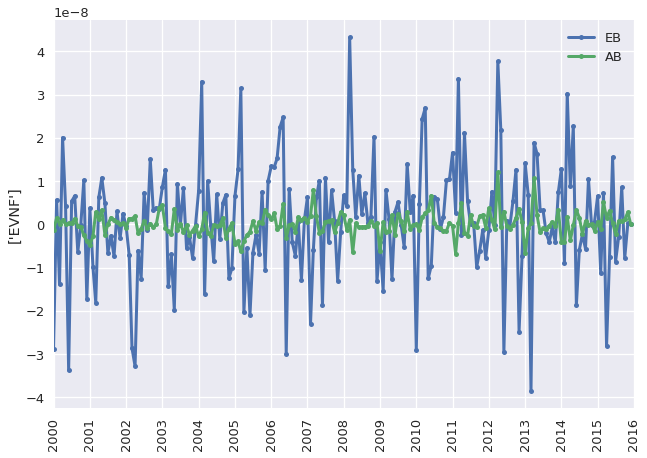

In [17]:
figsize = (10, 6)
rows,cols = 1,1

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator(interval=6)  # every month
years_fmt = mdates.DateFormatter('%Y')

#datemin = np.datetime64(df_eu_sep['time'][0], 'Y')
#datemax = np.datetime64(df_eu_sep['time'][-1], 'Y') + np.timedelta64(1, 'Y')
    
tracerlist = ['EVNF']
plt.style.use('seaborn')
plt.style.use('seaborn-talk')

#axs = plt.figure(figsize=figsize, constrained_layout=True).subplots(rows,cols)
fig, ax = plt.subplots(1,1)
#axs = fig.subplots(rows,cols,sharey=False,sharex=True)

var = tracerlist

ax.plot(df_eu_evnf[var], '.-', lw = 3, markersize = 10, label = 'EB')
ax.plot(df_am_evnf[var], '.-', lw = 3, markersize = 10, label = 'AB')
ax.set_ylabel(var)
# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
#axs[ind].xaxis.set_minor_locator(months)
# format the coords message box
ax.format_xdata = mdates.DateFormatter('%Y')
# round to nearest years.
ax.set_xlim('2000-01-01', '2016-01-01')

plt.setp(ax.get_xticklabels(),'rotation', 90)
ax.legend()
# fig.autofmt_xdate()

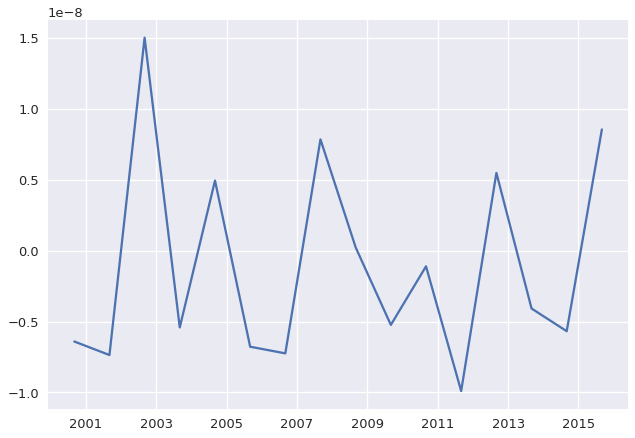

In [18]:
plt.plot(df_eu_evnf[df_eu_evnf.index.month == 9].EVNF)

In [19]:
df_eu_evnf_q = df_eu_evnf.resample('Y').sum()

# In case of use with xarray
# df_eu_evnf_q = df_eu_evnf[df_eu_evnf['time.season']=='DJF'].mean(dim='time')
# df_eu_evnf_q = df_eu_evnf_q.compute()

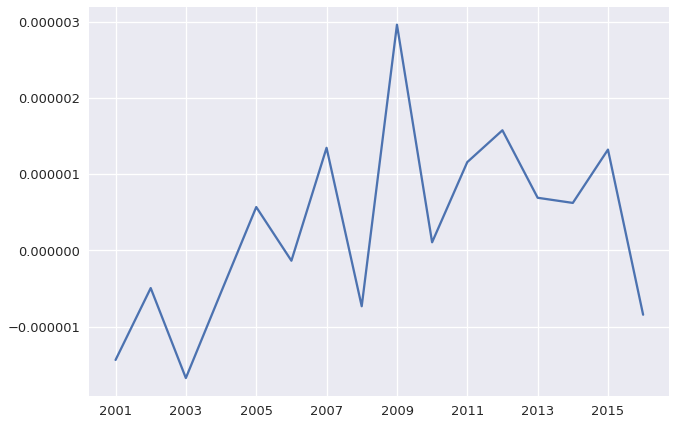

In [20]:
plt.plot(df_eu_evnf_q.EVNF*30)

In [21]:
df_eu_evnf_q = df_eu_evnf.resample('Q').mean()

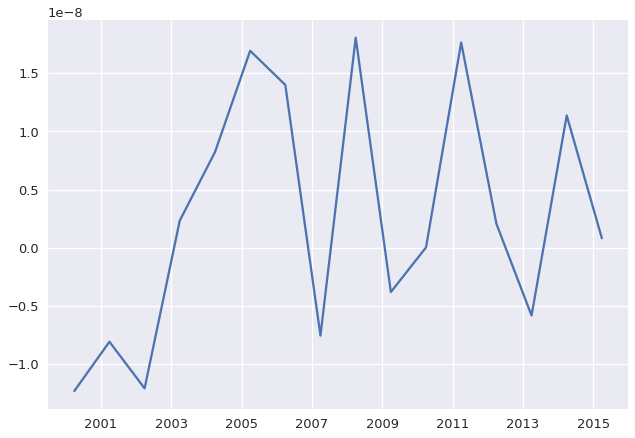

In [22]:
plt.plot(df_eu_evnf_q[df_eu_evnf_q.index.month == 3].EVNF)